<a href="https://colab.research.google.com/github/prateekchandrajha/mastering-ml-algorithms/blob/main/Ch_23_Deep_Belief_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Belief Networks

We're going to present two probabilistic generative models that
employ a set of latent variables to represent a specific data generation process.
Restricted Boltzmann Machines (RBMs), proposed in 1986, are the building
blocks of a more complex model, called a Deep Belief Network (DBN), which is
capable of capturing complex relationships among features at different levels (in a
way not dissimilar to a deep convolutional network). Both models can be used in
unsupervised and supervised scenarios as preprocessors or, as is usual with DBN,
fine-tuning the parameters using a standard backpropagation algorithm.

In this particular notebook, we will discuss:
- Markov random fields (MRF)
- RBM, including the Contrastive Divergence (CD-k) algorithm
- DBN with supervised and unsupervised examples

A Boltzmann distribution (also called Gibbs distribution) is a probability distribution or probability measure that gives the probability that a system will be in a certain state as a function of that state's energy and the temperature of the system.

In [2]:
!pip install git+git://github.com/albertbup/deep-belief-network.git

  Cloning git://github.com/albertbup/deep-belief-network.git to /tmp/pip-req-build-uqpytpxy
  Running command git clone -q git://github.com/albertbup/deep-belief-network.git /tmp/pip-req-build-uqpytpxy
     |████████████████████████████████| 16.8MB 1.1MB/s 
     |████████████████████████████████| 42.5MB 146kB/s 
     |████████████████████████████████| 11.8MB 36.1MB/s 
     |████████████████████████████████| 44.4MB 76kB/s 
     |████████████████████████████████| 3.0MB 51.2MB/s 
     |████████████████████████████████| 890kB 40.6MB/s 
  Created wheel for deep-belief-network: filename=deep_belief_network-1.0.4-cp36-none-any.whl size=13462 sha256=a0eb9b14a7d7c40e6bcefab34df802b034ce5b0831f05c3c52b249350d0019b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-i9n4_wkp/wheels/29/6d/3b/6a50cf42a32bdfaa903b17832d60d8d3e5dc4b0fd02ae8acaf
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107222 sha256=186c1e4bbaa5eecca87c5215c9356c56e1d4cc09bb4f34086860fd3dcb3e2d23

In [3]:
from dbn import UnsupervisedDBN

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle

(X_train, Y_train), (_, _) = \
 tf.keras.datasets.mnist.load_data()

X_train, Y_train = shuffle(X_train, Y_train,
 random_state=1000)

width = X_train.shape[1]
height = X_train.shape[2]
nb_samples = 400

X = X_train[0:nb_samples].reshape(
 (nb_samples, width * height)).\
 astype(np.float32) / 255.0
 
Y = Y_train[0:nb_samples]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:496: FutureWarning: Passing (type, 1) or 

11493376/11490434 [==============================]11493376/11490434 [==============================] - 0s 0us/step



In [5]:
unsupervised_dbn = UnsupervisedDBN(
 hidden_layers_structure=[512, 256, 64],
 learning_rate_rbm=0.05,
 n_epochs_rbm=100,
 batch_size=64,
 activation_function='sigmoid')

X_dbn = unsupervised_dbn.fit_transform(X)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 48.016402
>> Epoch 2 finished 	RBM Reconstruction error 46.810811
>> Epoch 3 finished 	RBM Reconstruction error 45.011379
>> Epoch 4 finished 	RBM Reconstruction error 42.557323
>> Epoch 5 finished 	RBM Reconstruction error 39.891303
>> Epoch 6 finished 	RBM Reconstruction error 37.403722
>> Epoch 7 finished 	RBM Reconstruction error 35.484298
>> Epoch 8 finished 	RBM Reconstruction error 33.678006
>> Epoch 9 finished 	RBM Reconstruction error 32.152239
>> Epoch 10 finished 	RBM Reconstruction error 30.870490
>> Epoch 11 finished 	RBM Reconstruction error 29.693026
>> Epoch 12 finished 	RBM Reconstruction error 28.690731
>> Epoch 13 finished 	RBM Reconstruction error 27.873825
>> Epoch 14 finished 	RBM Reconstruction error 27.188675
>> Epoch 15 finished 	RBM Reconstruction error 26.395407
>> Epoch 16 finished 	RBM Reconstruction error 25.654855
>> Epoch 17 finished 	RBM Reconstruction error 25.059635
>> Epoch 18 f

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
 perplexity=10,
 random_state=1000)

X_tsne = tsne.fit_transform(X_dbn)

In [9]:
X_tsne.shape

(400, 2)

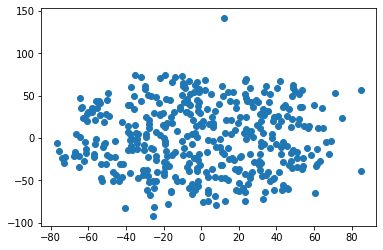

In [12]:
import matplotlib.pyplot as plt
Y=X_tsne
plt.scatter(Y[:, 0], Y[:, 1])